In [1]:
'''
Ref. https://github.com/adeshpande3/LSTM-Sentiment-Analysis/blob/master/Oriole%20LSTM.ipynb

First downloading data and uncompress
Be sure all dependecies are for python (libraries)
'''

'\nRef. https://github.com/adeshpande3/LSTM-Sentiment-Analysis/blob/master/Oriole%20LSTM.ipynb\n\nFirst downloading data and uncompress\nBe sure all dependecies are for python (libraries)\n'

In [2]:
''' Workflow
1 training a word vector generation model like Word2Vec. (or loading
                                                 pretrained vectors)
2 Creatins and ID matrix for our training set
3 RNN with LSTM units and creating and graph for computation
4 Training
5 Testing
'''

' Workflow\n1 training a word vector generation model like Word2Vec. (or loading\n                                                 pretrained vectors)\n2 Creatins and ID matrix for our training set\n3 RNN with LSTM units and creating and graph for computation\n4 Training\n5 Testing\n'

In [3]:
# we will use a word2vec trained which will be Glove 
# it contains 400000 words with 300 features

In [4]:
# defining/ checking the right directory
!ls

bin
etc
include
lib
lib64
LSTM-Sentiment-Analysis
NLP_Exploring.ipynb
pip-selfcheck.json
pyvenv.cfg
Sentimental_Analysis_TensorFlow_Based_On_OReilly_Post.ipynb
share


In [5]:
import os

In [6]:
os.chdir('LSTM-Sentiment-Analysis/')

### Loading data

In [7]:
import numpy as np

In [8]:
!ls

Dockerfile     models		  positiveReviews	  wordsList.npy
idsMatrix.npy  models.tar.gz	  Pre-Trained LSTM.ipynb  wordVectors.npy
Images	       negativeReviews	  README.md
LICENSE        Oriole LSTM.ipynb  training_data.tar.gz


In [9]:
wordsList = np.load('wordsList.npy')

In [10]:
type(wordsList)

numpy.ndarray

In [11]:
wordsList = wordsList.tolist()

In [12]:
type(wordsList)

list

In [13]:
wordsList = [word.decode('UTF-8') for word in wordsList]

In [14]:
wordVectors = np.load('wordVectors.npy')

In [15]:
type(wordVectors)

numpy.ndarray

In [16]:
type(wordsList)

list

In [17]:
wordVectors[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [18]:
wordsList[0]

'0'

In [19]:
wordVectors[10]

array([ 0.15272 ,  0.36181 , -0.22168 ,  0.066051,  0.13029 ,  0.37075 ,
       -0.75874 , -0.44722 ,  0.22563 ,  0.10208 ,  0.054225,  0.13494 ,
       -0.43052 , -0.2134  ,  0.56139 , -0.21445 ,  0.077974,  0.10137 ,
       -0.51306 , -0.40295 ,  0.40639 ,  0.23309 ,  0.20696 , -0.12668 ,
       -0.50634 , -1.7131  ,  0.077183, -0.39138 , -0.10594 , -0.23743 ,
        3.9552  ,  0.66596 , -0.61841 , -0.3268  ,  0.37021 ,  0.25764 ,
        0.38977 ,  0.27121 ,  0.043024, -0.34322 ,  0.020339,  0.2142  ,
        0.044097,  0.14003 , -0.20079 ,  0.074794, -0.36076 ,  0.43382 ,
       -0.084617,  0.1214  ], dtype=float32)

In [20]:
wordsList[10]

'for'

In [21]:
len(wordsList)

400000

In [22]:
wordVectors.shape

(400000, 50)

In [23]:
# We can also search our word list for a word like "baseball", 
# and then access its corresponding vector through 
# the embedding matrix.
baseballIndex = wordsList.index('baseball')
wordVectors[baseballIndex]

array([-1.9327  ,  1.0421  , -0.78515 ,  0.91033 ,  0.22711 , -0.62158 ,
       -1.6493  ,  0.07686 , -0.5868  ,  0.058831,  0.35628 ,  0.68916 ,
       -0.50598 ,  0.70473 ,  1.2664  , -0.40031 , -0.020687,  0.80863 ,
       -0.90566 , -0.074054, -0.87675 , -0.6291  , -0.12685 ,  0.11524 ,
       -0.55685 , -1.6826  , -0.26291 ,  0.22632 ,  0.713   , -1.0828  ,
        2.1231  ,  0.49869 ,  0.066711, -0.48226 , -0.17897 ,  0.47699 ,
        0.16384 ,  0.16537 , -0.11506 , -0.15962 , -0.94926 , -0.42833 ,
       -0.59457 ,  1.3566  , -0.27506 ,  0.19918 , -0.36008 ,  0.55667 ,
       -0.70315 ,  0.17157 ], dtype=float32)

### Vector representation of a sentence

In [24]:
import tensorflow as tf

In [25]:
maxSeqLength = 10 # maximum length of sentence
numDimensions = 300 # dimensions for each word vector

In [26]:
firstSentence = np.zeros((maxSeqLength), dtype='int32')

In [27]:
firstSentence

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [28]:
firstSentence[0] = wordsList.index('i')

In [29]:
firstSentence[1] = wordsList.index('thought')
firstSentence[2] = wordsList.index('the')
firstSentence[3] = wordsList.index('movie')
firstSentence[4] = wordsList.index('was')
firstSentence[5] = wordsList.index('incredible')
firstSentence[6] = wordsList.index('and')
firstSentence[7] = wordsList.index('inspiring')

In [30]:
firstSentence

array([    41,    804, 201534,   1005,     15,   7446,      5,  13767,
            0,      0], dtype=int32)

In [31]:
with tf.Session() as sess:
    print(tf.nn.embedding_lookup(wordVectors, firstSentence).eval().shape)

(10, 50)


In [32]:
sess._closed

True

In [33]:
wordVectors[10]

array([ 0.15272 ,  0.36181 , -0.22168 ,  0.066051,  0.13029 ,  0.37075 ,
       -0.75874 , -0.44722 ,  0.22563 ,  0.10208 ,  0.054225,  0.13494 ,
       -0.43052 , -0.2134  ,  0.56139 , -0.21445 ,  0.077974,  0.10137 ,
       -0.51306 , -0.40295 ,  0.40639 ,  0.23309 ,  0.20696 , -0.12668 ,
       -0.50634 , -1.7131  ,  0.077183, -0.39138 , -0.10594 , -0.23743 ,
        3.9552  ,  0.66596 , -0.61841 , -0.3268  ,  0.37021 ,  0.25764 ,
        0.38977 ,  0.27121 ,  0.043024, -0.34322 ,  0.020339,  0.2142  ,
        0.044097,  0.14003 , -0.20079 ,  0.074794, -0.36076 ,  0.43382 ,
       -0.084617,  0.1214  ], dtype=float32)

In [34]:
firstSentence

array([    41,    804, 201534,   1005,     15,   7446,      5,  13767,
            0,      0], dtype=int32)

### creating ids matrix for our imdb review dataset

In [35]:
from os import listdir
from os.path import isfile, join

In [36]:
import os

In [37]:
!ls

Dockerfile     models		  positiveReviews	  wordsList.npy
idsMatrix.npy  models.tar.gz	  Pre-Trained LSTM.ipynb  wordVectors.npy
Images	       negativeReviews	  README.md
LICENSE        Oriole LSTM.ipynb  training_data.tar.gz


In [38]:
positiveFiles = ['positiveReviews/' + f for f in 
                 listdir('positiveReviews/') if 
                 isfile(join('positiveReviews/', f))]

In [39]:
negativeFiles = ['negativeReviews/' + f for f in 
                 listdir('negativeReviews/') if 
                 isfile(join('negativeReviews/', f))]

In [40]:
type(positiveFiles)

list

In [41]:
positiveFiles[0]

'positiveReviews/9257_7.txt'

In [42]:
positiveFiles[10]

'positiveReviews/4230_10.txt'

In [43]:
len(positiveFiles)

12500

#### processing words

In [44]:
numWords = []

In [45]:
for pf in positiveFiles:
    with open(pf, 'r', encoding='utf-8') as f:
        line = f.readline()
        counter = len(line.split())
        numWords.append(counter)
print('Positive files finished')

Positive files finished


In [46]:
numWords[0:10]

[148, 177, 71, 337, 105, 410, 188, 250, 158, 275]

In [47]:
len(numWords)

12500

In [48]:
for nf in negativeFiles:
    with open(nf, 'r', encoding='utf-8') as f:
        line = f.readline()
        counter = len(line.split())
        numWords.append(counter)
print('Negative files finished')

Negative files finished


In [49]:
len(numWords)

25000

In [50]:
numFiles = len(numWords)
print('The total number of files is', numFiles)
print('The total number of words in the files is', sum(numWords))
print('The average number of words in the files is', sum(numWords)/len(numWords))

The total number of files is 25000
The total number of words in the files is 5844680
The average number of words in the files is 233.7872


#### using matplotlib to visualize the data

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

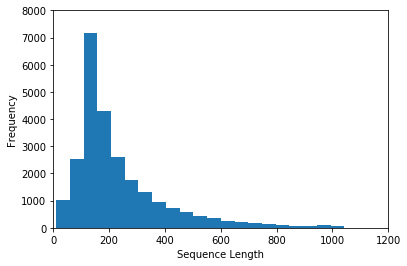

In [52]:
plt.hist(numWords, 50)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.axis([0, 1200, 0, 8000])
plt.show()

In [53]:
'''
From the histogram as well as the average number of words 
per file, we can safely say that most reviews will fall 
under 250 words, which is the max sequence length value 
we will set.
'''

'\nFrom the histogram as well as the average number of words \nper file, we can safely say that most reviews will fall \nunder 250 words, which is the max sequence length value \nwe will set.\n'

In [54]:
maxSeqLength = 250

### converting to ids matrix only a single file of positiveFiles

In [55]:
fname = positiveFiles[1]
with open(fname) as f:
    for lines in f:
        print(lines)
        exit

At first glance I expected this film to be crappy because I thought the plot would be so excessively feminist. But I was wrong. As you maybe have read in earlier published comments, I agree in that the feminist part in this film does not bother. I never had the idea that the main character was exaggerating her position as a woman. It's like Guzman is presented as somebody with a spine, this in contrast to her classmates. So I was surprised by the story, in fact, I thought it was quite good, except for the predictable end. Maybe it would've been a better idea to give the plot a radical twist, so that the viewer is somewhat more surprised.<br /><br />In addition, I'd like to say that Rodriguez earned her respect by the way she put away her character. I can't really explain why, but especially in the love scenes she convinced me. It just looked real I think.<br /><br />I gave it a 7 out of 10, merely because of the dull last half hour.


In [56]:
#how operate readline and split
with open(fname) as f:
    A1 = f.readline()
    print(A1)
    A2 = A1.split()
    print(A2)

At first glance I expected this film to be crappy because I thought the plot would be so excessively feminist. But I was wrong. As you maybe have read in earlier published comments, I agree in that the feminist part in this film does not bother. I never had the idea that the main character was exaggerating her position as a woman. It's like Guzman is presented as somebody with a spine, this in contrast to her classmates. So I was surprised by the story, in fact, I thought it was quite good, except for the predictable end. Maybe it would've been a better idea to give the plot a radical twist, so that the viewer is somewhat more surprised.<br /><br />In addition, I'd like to say that Rodriguez earned her respect by the way she put away her character. I can't really explain why, but especially in the love scenes she convinced me. It just looked real I think.<br /><br />I gave it a 7 out of 10, merely because of the dull last half hour.
['At', 'first', 'glance', 'I', 'expected', 'this', 'f

In [57]:
#processing to leave only characters
import re
strip_special_chars = re.compile("[^A-Za-z0-9 ]+]")

In [58]:
def cleanSentences(string):
    string = string.lower().replace("<br />"," ")
    return re.sub(strip_special_chars, " ", string.lower())

In [59]:
firstFile = np.zeros((maxSeqLength), dtype='int32')
with open(fname) as f:
    indexCounter = 0
    line = f.readline()
    cleanedLine = cleanSentences(line)
    split = cleanedLine.split()
    for word in split:
        if indexCounter < maxSeqLength:
            try:
                firstFile[indexCounter] = wordsList.index(word)
            except ValueError:
                firstFile[indexCounter] = 399999
            indexCounter = indexCounter + 1

In [60]:
firstFile

array([    22,     58,  10145,     41,    287,     37,    319,      4,
           30, 100580,    113,     41,    804, 201534,   2219,     54,
           30,    100,  23808, 399999,     34,     41,     15, 399999,
           19,     81,   1881,     33,   1465,      6,    350,    735,
       399999,     41,   2137,      6,     12, 201534,  11853,    153,
            6,     37,    319,    260,     36, 399999,     41,    332,
           40, 201534,   1159,     12, 201534,    444,   1395,     15,
        30459,     71,    704,     19,      7, 399999, 399999,    117,
        17301,     14,   1923,     19,   4377,     17,      7, 399999,
           37,      6,   3313,      4,     71, 399999,    100,     41,
           15,   3553,     21, 201534, 399999,      6, 399999,     41,
          804,     20,     15,   1689, 399999,   2077,     10, 201534,
        12670, 399999,   1881,     20, 399999,     51,      7,    439,
         1159,      4,    455, 201534,   2219,      7,   3412, 399999,
      

In [61]:
len(firstFile)

250

In [62]:
# because is so expensive compute 250000 reviews to get
# a ids matrix
# well, we load a pre-computed matrix

In [63]:
!ls

Dockerfile     models		  positiveReviews	  wordsList.npy
idsMatrix.npy  models.tar.gz	  Pre-Trained LSTM.ipynb  wordVectors.npy
Images	       negativeReviews	  README.md
LICENSE        Oriole LSTM.ipynb  training_data.tar.gz


In [64]:
ids = np.load('idsMatrix.npy')

In [65]:
ids.shape

(25000, 250)

### functions that you will find helping when training the network later

In [66]:
from random import randint

In [67]:
def getTrainBatch():
    labels = []
    arr = np.zeros([batchSize, maxSeqLength])
    for i in range(batchSize):
        if (i % 2 == 0):
            num = randint(1, 11499)
            labels.append([1,0])
        else:
            num = randint(13499, 24999)
            labels.append([0,1])
        arr[i] = ids[num-1:num]
    return arr, labels

In [68]:
def getTestBatch():
    labels = []
    arr = np.zeros([batchSize, maxSeqLength])
    for i in range(batchSize):
        num = randint(11499,13499)
        if (num <= 12999):
            labels.append([1,0])
        else:
            labels.append([0,1])
        arr[i] = ids[num-1:num]
    return arr, labels            

### RNN Model

In [69]:
# tf.placeholder is used to feed actual training examples

# tf.Variable for is used for trainable variables 
# such as weights (W) and biases (B) for your model.

# CONCLUSION: 
# Variables are trained over time, 
# Placeholders are input data that doesn't change 
# as your model trains

In [70]:
# defining some parameter 
batchSize = 24
lstmUnits = 64
numClasses = 2
iterations = 100000

In [71]:
import tensorflow as tf
tf.reset_default_graph()

In [72]:
labels = tf.placeholder(tf.float32, [batchSize, numClasses])
input_data = tf.placeholder(tf.int32, [batchSize, maxSeqLength])

In [73]:
# getting our word vector
data = tf.Variable(tf.zeros([batchSize, maxSeqLength, numDimensions]), dtype=tf.float32)
data = tf.nn.embedding_lookup(wordVectors, input_data)

In [74]:
# using LSTM cell
lstmCell = tf.contrib.rnn.BasicLSTMCell(lstmUnits)
lstmCell = tf.contrib.rnn.DropoutWrapper(cell=lstmCell, output_keep_prob=0.75)
value, _ = tf.nn.dynamic_rnn(lstmCell, data, dtype=tf.float32)

In [75]:
# getting first output of a rnn
weight = tf.Variable(tf.truncated_normal([lstmUnits, numClasses]))
bias = tf.Variable(tf.constant(0.1, shape=[numClasses]))

In [76]:
value = tf.transpose(value, [1, 0, 2])
last = tf.gather(value, int(value.get_shape()[0]) - 1)
prediction = (tf.matmul(last, weight) + bias)

In [77]:
# correct prediction and accuracy metrics 
# to track how the network is doing
correctPred = tf.equal(tf.argmax(prediction,1), tf.argmax(labels,1))
accuracy = tf.reduce_mean(tf.cast(correctPred, tf.float32))

In [78]:
# defining a standard cross entropy loss with a softmax layer
# For the optimizer, we’ll use Adam 
# default learning rate of .001
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits
                     (logits=prediction, labels=labels))
optimizer = tf.train.AdamOptimizer().minimize(loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [79]:
tf.all_variables()

Instructions for updating:
Please use tf.global_variables instead.


[<tf.Variable 'Variable:0' shape=(24, 250, 300) dtype=float32_ref>,
 <tf.Variable 'rnn/basic_lstm_cell/kernel:0' shape=(114, 256) dtype=float32_ref>,
 <tf.Variable 'rnn/basic_lstm_cell/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=(64, 2) dtype=float32_ref>,
 <tf.Variable 'Variable_2:0' shape=(2,) dtype=float32_ref>,
 <tf.Variable 'beta1_power:0' shape=() dtype=float32_ref>,
 <tf.Variable 'beta2_power:0' shape=() dtype=float32_ref>,
 <tf.Variable 'rnn/basic_lstm_cell/kernel/Adam:0' shape=(114, 256) dtype=float32_ref>,
 <tf.Variable 'rnn/basic_lstm_cell/kernel/Adam_1:0' shape=(114, 256) dtype=float32_ref>,
 <tf.Variable 'rnn/basic_lstm_cell/bias/Adam:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'rnn/basic_lstm_cell/bias/Adam_1:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_1/Adam:0' shape=(64, 2) dtype=float32_ref>,
 <tf.Variable 'Variable_1/Adam_1:0' shape=(64, 2) dtype=float32_ref>,
 <tf.Variable 'Variable_2/Adam:0' shape=(2,) dtype=floa

In [80]:
# using a pretrained model

In [81]:
tf.__version__

'1.8.0'

In [82]:
!wget https://raw.githubusercontent.com/tensorflow/tensorflow/master/tensorflow/contrib/rnn/python/tools/checkpoint_convert.py

--2018-06-22 16:09:35--  https://raw.githubusercontent.com/tensorflow/tensorflow/master/tensorflow/contrib/rnn/python/tools/checkpoint_convert.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.4.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.4.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11728 (11K) [text/plain]
Saving to: ‘checkpoint_convert.py’

checkpoint_convert. 100%[===================>]  11,45K  --.-KB/s    in 0,04s   

2018-06-22 16:09:36 (276 KB/s) - ‘checkpoint_convert.py’ saved [11728/11728]



In [83]:
!ls

checkpoint_convert.py  models		  Pre-Trained LSTM.ipynb
Dockerfile	       models.tar.gz	  README.md
idsMatrix.npy	       negativeReviews	  training_data.tar.gz
Images		       Oriole LSTM.ipynb  wordsList.npy
LICENSE		       positiveReviews	  wordVectors.npy


In [84]:
!python checkpoint_convert.py models/pretrained_lstm.ckpt-90000 converted-checkpoints/pretrained_lstm-90000.ckpt

2018-06-22 16:09:38.197202: I tensorflow/core/platform/cpu_feature_guard.cc:140] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2


In [85]:
!ls -all

total 297580
drwxrwxr-x 8 ivan ivan     4096 jun 22 16:09 .
drwxrwxr-x 9 ivan ivan     4096 jun 22 15:54 ..
-rw-rw-r-- 1 ivan ivan    11728 jun 22 16:09 checkpoint_convert.py
drwxr-xr-x 2 ivan ivan     4096 jun 22 16:09 converted-checkpoints
-rw-rw-r-- 1 ivan ivan      378 jun 21 15:34 Dockerfile
drwxrwxr-x 8 ivan ivan     4096 jun 21 15:34 .git
-rw-rw-r-- 1 ivan ivan       10 jun 21 15:34 .gitignore
-rw-r--r-- 1 ivan ivan 25000080 mar 13  2017 idsMatrix.npy
drwxrwxr-x 2 ivan ivan     4096 jun 21 15:34 Images
-rw-rw-r-- 1 ivan ivan     1071 jun 21 15:34 LICENSE
drwxrwxr-x 2 ivan ivan     4096 mar 27  2017 models
-rw-rw-r-- 1 ivan ivan 73618696 jun 21 15:34 models.tar.gz
drwxr-xr-x 2 ivan ivan   344064 awr 12  2011 negativeReviews
-rw-rw-r-- 1 ivan ivan    44643 jun 21 15:34 Oriole LSTM.ipynb
drwxr-xr-x 2 ivan ivan   348160 awr 12  2011 positiveReviews
-rw-rw-r-- 1 ivan ivan     6976 jun 21 15:34 Pre-Trained LSTM.ipynb
-rw-rw-r-- 1 ivan ivan     4242 jun 21 15:34 README.md
-rw-rw-r-- 1 

In [86]:
!rm -rf models

In [87]:
!mv converted-checkpoints models

In [88]:
!ls -all

total 297576
drwxrwxr-x 7 ivan ivan     4096 jun 22 16:09 .
drwxrwxr-x 9 ivan ivan     4096 jun 22 15:54 ..
-rw-rw-r-- 1 ivan ivan    11728 jun 22 16:09 checkpoint_convert.py
-rw-rw-r-- 1 ivan ivan      378 jun 21 15:34 Dockerfile
drwxrwxr-x 8 ivan ivan     4096 jun 21 15:34 .git
-rw-rw-r-- 1 ivan ivan       10 jun 21 15:34 .gitignore
-rw-r--r-- 1 ivan ivan 25000080 mar 13  2017 idsMatrix.npy
drwxrwxr-x 2 ivan ivan     4096 jun 21 15:34 Images
-rw-rw-r-- 1 ivan ivan     1071 jun 21 15:34 LICENSE
drwxr-xr-x 2 ivan ivan     4096 jun 22 16:09 models
-rw-rw-r-- 1 ivan ivan 73618696 jun 21 15:34 models.tar.gz
drwxr-xr-x 2 ivan ivan   344064 awr 12  2011 negativeReviews
-rw-rw-r-- 1 ivan ivan    44643 jun 21 15:34 Oriole LSTM.ipynb
drwxr-xr-x 2 ivan ivan   348160 awr 12  2011 positiveReviews
-rw-rw-r-- 1 ivan ivan     6976 jun 21 15:34 Pre-Trained LSTM.ipynb
-rw-rw-r-- 1 ivan ivan     4242 jun 21 15:34 README.md
-rw-rw-r-- 1 ivan ivan 98090940 jun 21 15:34 training_data.tar.gz
-rw-r--r-- 1 i

In [89]:
sess = tf.InteractiveSession()
saver = tf.train.Saver()
saver.restore(sess, tf.train.latest_checkpoint('models'))

INFO:tensorflow:Restoring parameters from models/pretrained_lstm-90000.ckpt


In [90]:
iterations = 10
for i in range(iterations):
    nextBatch, nextBatchLabels = getTestBatch();
    print("Accuracy for this batch:", (sess.run(accuracy, {input_data: nextBatch, labels: nextBatchLabels})) * 100)

Accuracy for this batch: 66.66666865348816
Accuracy for this batch: 87.5
Accuracy for this batch: 58.33333134651184
Accuracy for this batch: 75.0
Accuracy for this batch: 62.5
Accuracy for this batch: 70.83333134651184
Accuracy for this batch: 75.0
Accuracy for this batch: 75.0
Accuracy for this batch: 75.0
Accuracy for this batch: 58.33333134651184


In [91]:
!ls models/

checkpoint
pretrained_lstm-90000.ckpt.data-00000-of-00001
pretrained_lstm-90000.ckpt.index
pretrained_lstm-90000.ckpt.meta
